In [0]:
import numpy as np
import matplotlib.pyplot as plt
#### Configuración ####
snr_dB = np.array([1,2,3,4,5,6,7,8,9,10])
nb_simbolos = 10000000
#######################
hipotesis = np.random.randint(0,1,nb_simbolos)
codigos = [1 for i in range(len(hipotesis)) if hipotesis[i]==0 ] # señal +1,-1
snr = pow(10,snr_dB/10.) # Potencia en veces
noise_variance = 1/snr
  

In [2]:
ber = np.array([])
for variance in noise_variance:
  noise = np.sqrt(variance) * np.random.randn(nb_simbolos)
  signal_received = codigos + noise
  code_detected =[1 if signal_received[i]>0 else -1 for i in range(len(signal_received)) ]
  ber = np.append(ber, sum(abs(np.array(code_detected) - codigos)/2)/nb_simbolos)
print(ber)

[0.1310016 0.1040167 0.0789251 0.0565245 0.0375991 0.0229309 0.0125905
 0.0060209 0.0024129 0.0007789]


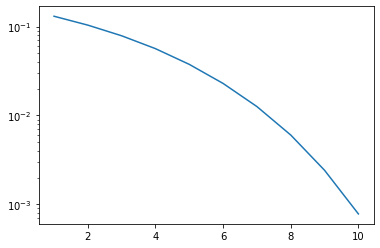

In [3]:
plt.semilogy(snr_dB,ber)

De la sección 2.4.1 sabemos que la probabilidad de error para hipótesis binaria equiprobable está dada por
$$Pe = Q(\frac{d}{2\sigma})$$
La función Q podemos calcularla o aproximarla de varias formas. Revisar la sección 2.3 para recordar las distintas cotas que pueden emplearse.

Para el siguiente cálculo, yo empleará la función acumulativa y la propiedad de la probabilidad

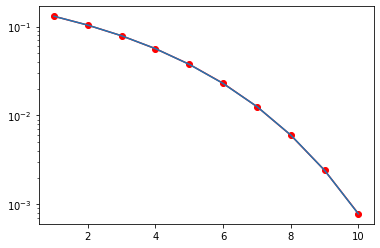

In [4]:
import scipy.stats as stats

d = 1-(-1) # distancia entre los códigos
pe = 1 - stats.norm.cdf(d/(2*np.sqrt(noise_variance)))
plt.semilogy(snr_dB, pe, 'r',marker='o')
plt.semilogy(snr_dB, ber)
